<a href="https://colab.research.google.com/github/jasmeet12/FishClassification/blob/master/fishclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import PIL


# New Section

In [0]:
!pip install google_images_download

In [0]:
from google_images_download import google_images_download

In [0]:
PATH = "/fastai/data/fishData/"
nof_pics = 100


In [0]:
response = google_images_download.googleimagesdownload()

arguments = {"keywords":"Bluefin Tuna -cook -food, red snapper fish -cook -food,Orange Roughy -cook -food, Beluga Sturgeon -cook -food, Lingcod -cook -food, Salmon full fish -cook -food, Sardines full fish -cook -food, Catfish -cook -food, Bass fish -cook -food, Swordfish -cook -food, Herring fish -cook -food, tilapia fish -cook -food, Trout fish -cook -food, Arctic char fish -cook -food, haddock full fish -cook -food ",
             "limit":nof_pics,
             "print_urls":False,
             "output_directory":f'{PATH}train',
             "chromedriver":"/usr/bin/chromedriver"}

paths = response.download(arguments)

In [0]:
def check_images(PATH):
    broken_images=[]
    for pic_class in os.listdir(PATH):
        for pic in os.listdir(f'{PATH}/{pic_class}'):
            try:
                img = PIL.Image.open(f'{PATH}/{pic_class}/{pic}') 
                img.verify()
            except (IOError, SyntaxError) as e:
                print('Bad file:', f'{PATH}/{pic_class}/{pic}')
                broken_images.append(f'{PATH}/{pic_class}/{pic}')
    return broken_images

In [0]:
img_to_del = check_images(f'{PATH}train')

Bad file: /fastai/data/fishData/train/ tilapia fish -cook -food/21.tilapia-carton.png


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 5. 
  warnings.warn(str(msg))


In [0]:
[os.remove(pic) for pic in img_to_del]

[None]

In [0]:
# import shutil

# shutil.rmtree(f'{PATH}/valid')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
src = PATH
path = "/content/gdrive/My Drive/smallFishDataset/"
shutil.copytree(src, path)


'/content/gdrive/My Drive/smallFishDataset/'

In [0]:
def make_val_set(PATH, nof_val_pics):
    if not os.path.exists(f'{PATH}valid'):
        os.makedirs(f'{PATH}valid')
        for pic_class in os.listdir(f'{PATH}train'):
            os.makedirs(f'{PATH}valid/{pic_class}')
            for pic in random.sample(os.listdir(f'{PATH}train/{pic_class}'), nof_val_pics):
                os.rename(f'{PATH}train/{pic_class}/{pic}', 
                          f'{PATH}valid/{pic_class}/{pic}')
    else:
        warnings.warn("The validation folder already exists! No validation set created.")

In [0]:
# make_val_set(PATH, 20)
path = '/content/gdrive/My Drive/smallFishDataset/'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train", valid_pct=0.2,
        ds_tfms=get_transforms(), size=128, num_workers=4).normalize(imagenet_stats)


In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


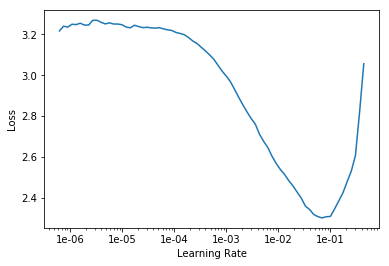

In [0]:

learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 21e-05
learn.fit_one_cycle(8,slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.528154,1.586494,0.473684,01:05
1,1.535449,1.496716,0.466667,01:06
2,1.467622,1.434608,0.428070,01:04
3,1.403811,1.376002,0.392982,01:04
4,1.319298,1.336693,0.389474,01:05
5,1.265978,1.325222,0.385965,01:05
6,1.214293,1.321876,0.389474,01:06
7,1.177739,1.312214,0.389474,01:06


In [0]:
learn.save('stage-1-fish')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

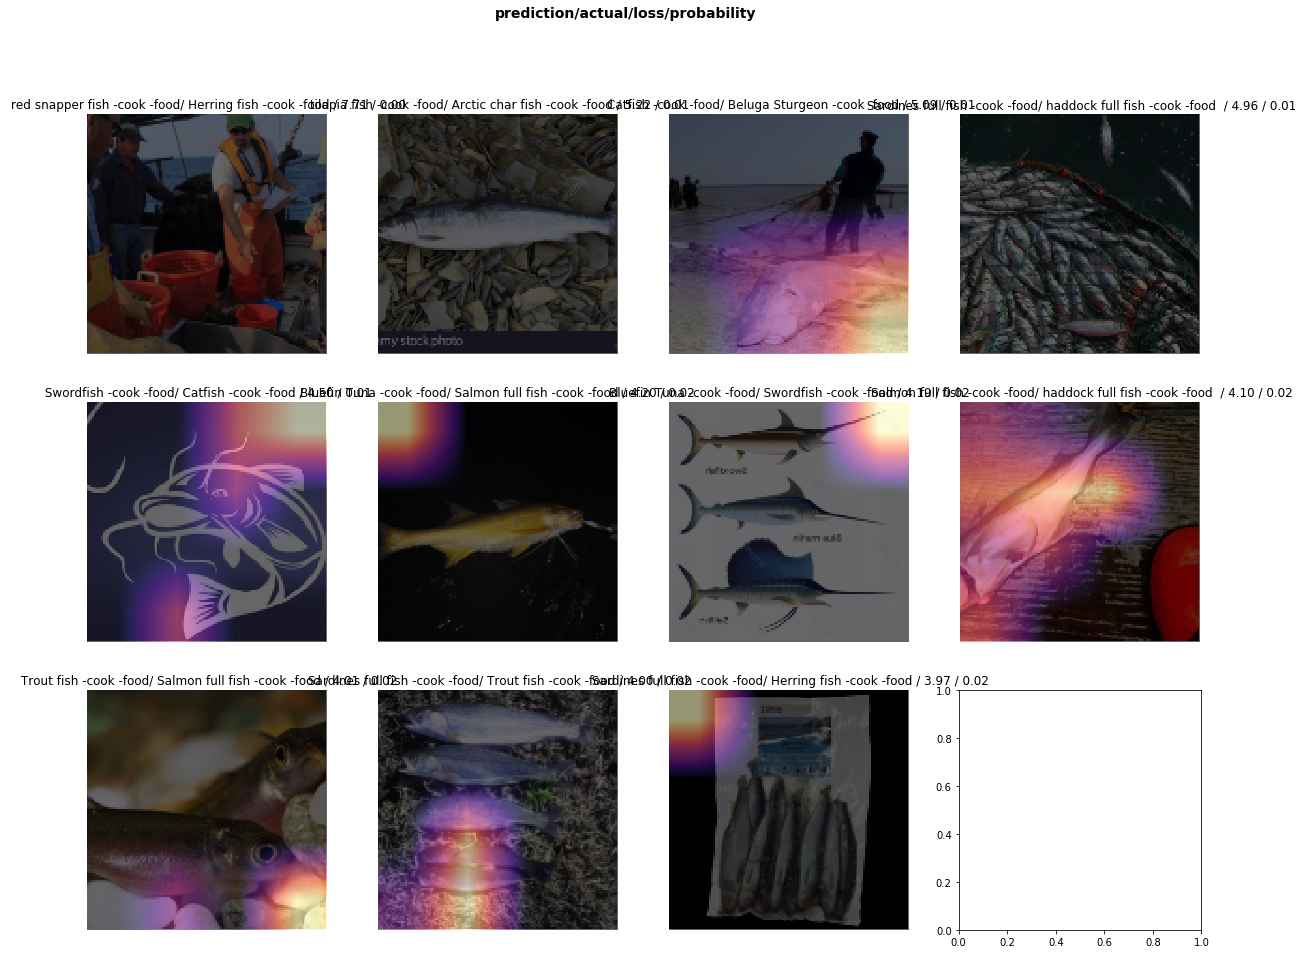

In [0]:
interp.plot_top_losses(11, figsize=(20,15))

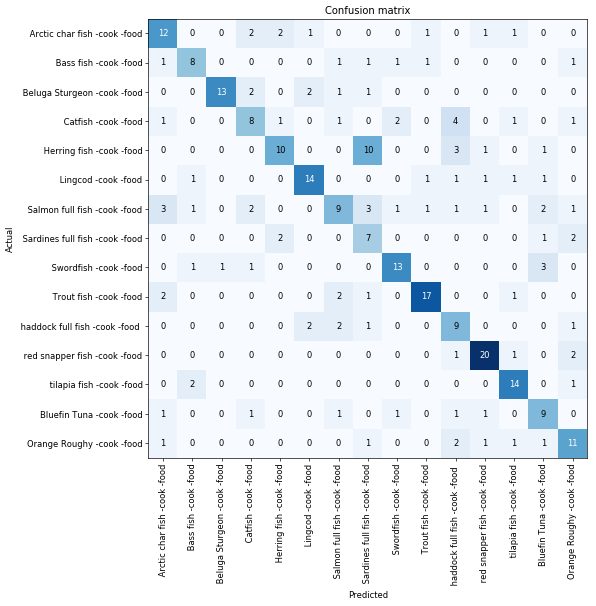

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

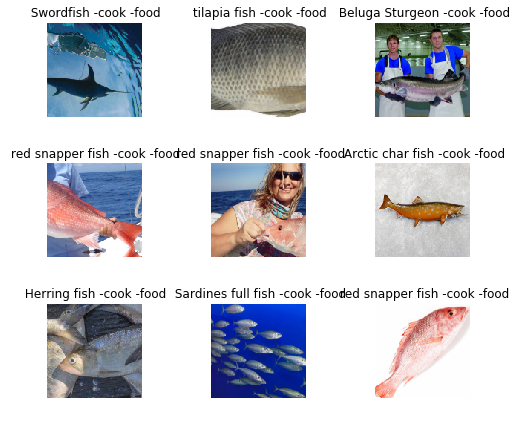

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn.unfreeze()


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


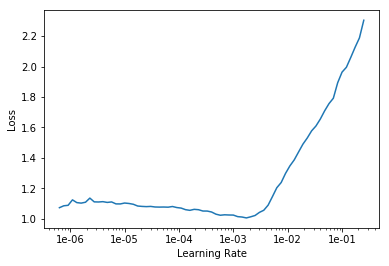

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.689976,1.060479,0.313333,01:13
1,0.684750,1.039739,0.310000,01:11
2,0.663169,1.023903,0.310000,01:12
3,0.626209,1.018163,0.306667,01:11
4,0.604058,1.013846,0.306667,01:10
5,0.581670,1.014237,0.306667,01:10
